In [46]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [47]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
lending_data_df = pd.read_csv("Resources/lending_data.csv")
# Review the DataFrame
# YOUR CODE HERE!
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [48]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = lending_data_df.loan_status
# Separate the X variable, the features
# YOUR CODE HERE!
X = lending_data_df.drop(columns = 'loan_status', axis = 1)

In [49]:
# Review the y variable Series
# YOUR CODE HERE!
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [50]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X[:]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [51]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [52]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
logistic_classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
# YOUR CODE HERE!
logistic_classifier.fit(X_train, y_train)

/opt/anaconda3/envs/dev_2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [53]:
# Make a prediction using the testing data
# YOUR CODE HERE!
logistic_predictions = logistic_classifier.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [54]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)

[[18655   110]
 [   36   583]]


In [55]:
# Print the classification report for the model
# YOUR CODE HERE!
classification_report=classification_report(y_test, logistic_predictions)
print("Classification_report:")
print(classification_report)      
                           

Classification_report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



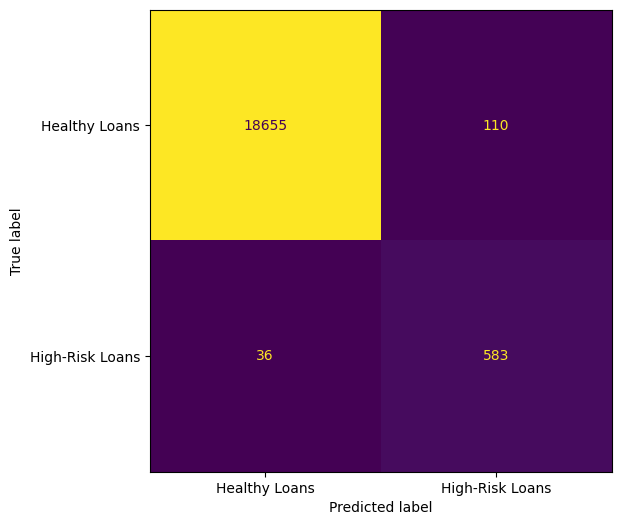

<Figure size 640x480 with 0 Axes>

In [57]:
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# create confusion matrix from predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logistic_predictions,  
    ax=ax,
    display_labels=["Healthy Loans", "High-Risk Loans"], 
    colorbar=False
)
plt.show()
plt.savefig("Resources/loan_plot", dpi=150)  # save the plot

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
The logistic regression model performs well according to the imbalanced accuracy metric with approximately 99% score. However from the classification report, for the Risky loans, we get a relatively smaller recall, and precision is mixed compared to the healthy loans with a precision of 100%. Because the Healthy Loan class is so much larger, the classifier focuses on getting that class(the healthy loan) right, and not the smaller high-risky Loan class.

---